In [1]:
# download data file
!curl 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv' > local_training_data/car-price.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1440k  100 1440k    0     0  5792k      0 --:--:-- --:--:-- --:--:-- 5810k


In [2]:
!head -n 5 local_training_data/car-price.csv

Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


In [3]:
# import libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('local_training_data/car-price.csv')

In [5]:
len(df)

11914

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [14]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [16]:
df.msrp < 100000

0        True
1        True
2        True
3        True
4        True
         ... 
11909    True
11910    True
11911    True
11912    True
11913    True
Name: msrp, Length: 11914, dtype: bool

In [17]:
df.msrp[df.msrp < 100000]

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11276, dtype: int64

In [18]:
df[df.msrp < 100000]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


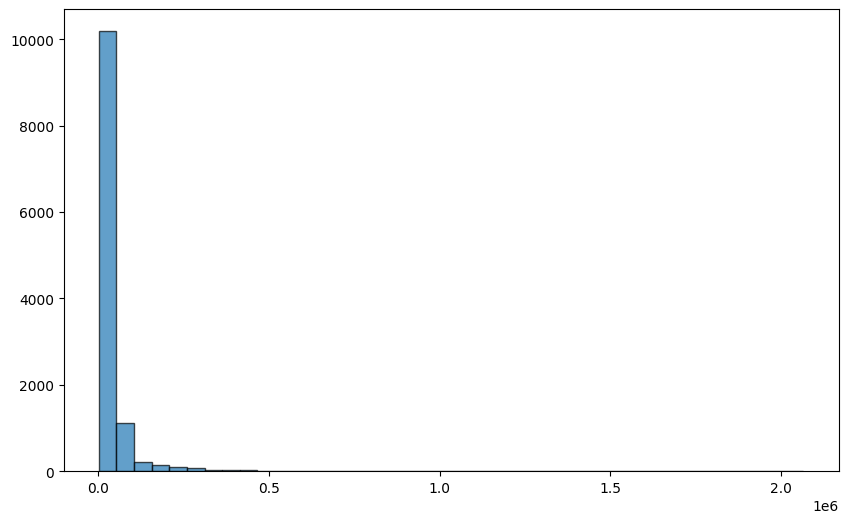

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df.msrp, bins=40, edgecolor='black', alpha=0.7)
plt.show()

In [25]:
def plot_histogram(data, title: str = '', xlabel: str = '', ylabel: str = 'Frequency') -> None:
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, edgecolor='black')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

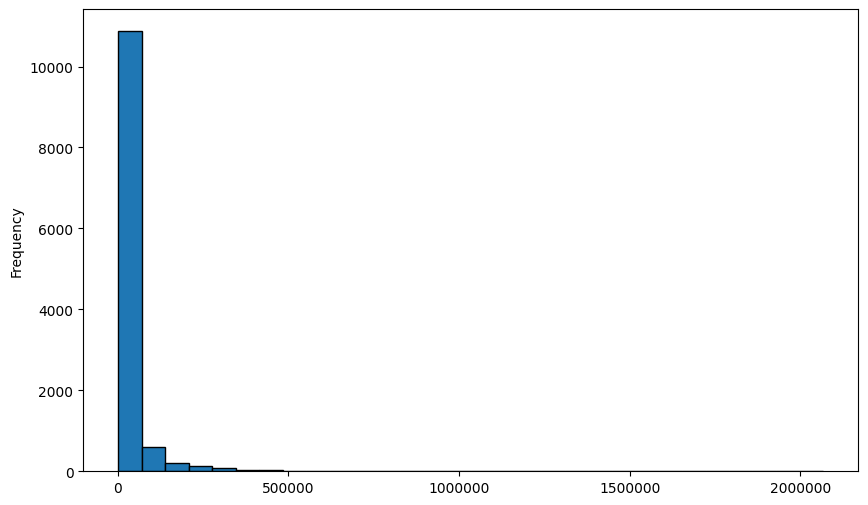

In [26]:
plot_histogram(df.msrp)

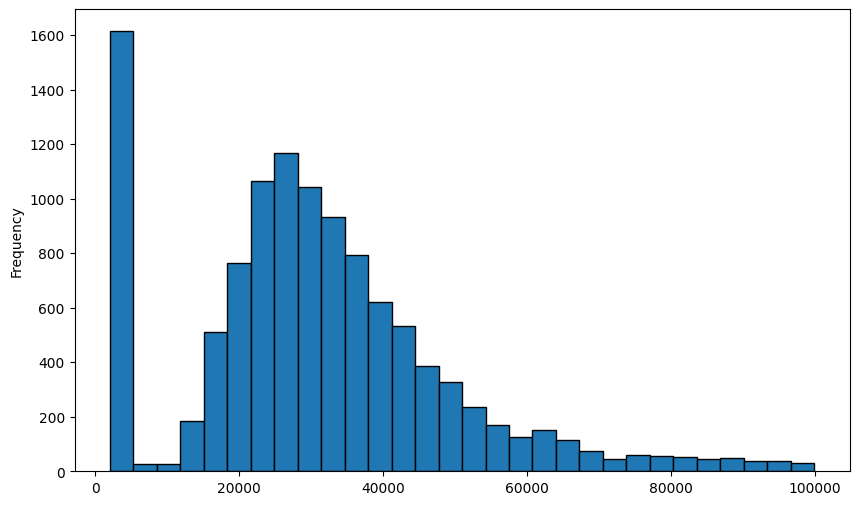

In [27]:
plot_histogram(df.msrp[df.msrp < 100000])

In [29]:
log_price = np.log1p(df.msrp)
print(type(df.msrp))
print(type(log_price))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


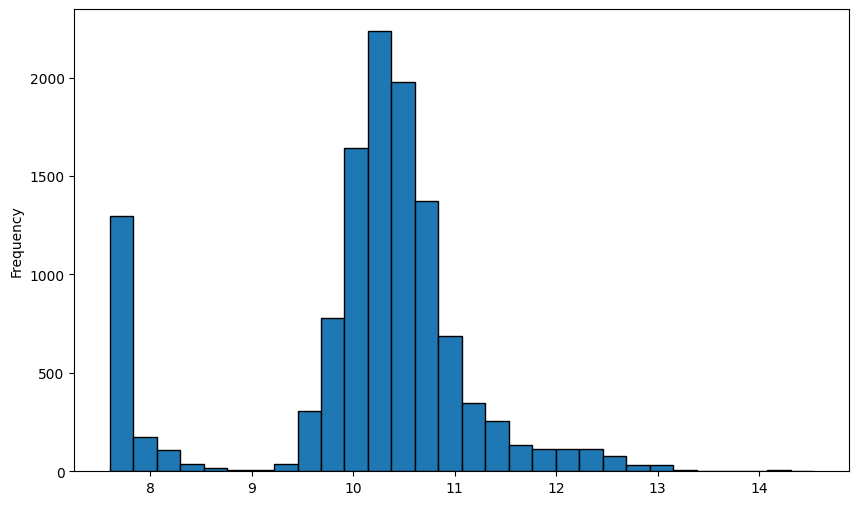

In [30]:
plot_histogram(log_price)

In [33]:
def check_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    return df.isnull().sum()

In [34]:
check_missing_values(df)

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [36]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print(n_val, n_test, n_train)

2382 2382 7150


In [38]:
np.random.seed(2)
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [40]:
np.random.shuffle(idx)
idx

array([8732, 4245, 4587, ..., 8241, 5898, 1903])

In [41]:
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8732,chevrolet,s-10_blazer,1993,regular_unleaded,165.0,6.0,manual,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,22,16,1385,2000
4245,suzuki,esteem,2002,regular_unleaded,122.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,31,24,481,13799
4587,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,15,5657,50580
2200,chevrolet,camaro,2017,premium_unleaded_(required),650.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",midsize,coupe,20,14,1385,61140
5705,hummer,h3t,2010,regular_unleaded,239.0,5.0,manual,four_wheel_drive,4.0,"crossover,flex_fuel,luxury",compact,crew_cab_pickup,18,14,130,30915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,audi,v8,1993,regular_unleaded,276.0,8.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,18,13,3105,2149
5948,dodge,intrepid,2004,regular_unleaded,244.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,25,16,1851,25105
8241,dodge,ramcharger,1993,regular_unleaded,230.0,8.0,automatic,rear_wheel_drive,2.0,NaN,midsize,2dr_suv,16,11,1851,2000
5898,honda,insight,2012,regular_unleaded,98.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,44,41,2202,23690


In [43]:
df_train = df_shuffled.iloc[:n_train].copy()
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8732,chevrolet,s-10_blazer,1993,regular_unleaded,165.0,6.0,manual,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,22,16,1385,2000
4245,suzuki,esteem,2002,regular_unleaded,122.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,31,24,481,13799
4587,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,15,5657,50580
2200,chevrolet,camaro,2017,premium_unleaded_(required),650.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",midsize,coupe,20,14,1385,61140
5705,hummer,h3t,2010,regular_unleaded,239.0,5.0,manual,four_wheel_drive,4.0,"crossover,flex_fuel,luxury",compact,crew_cab_pickup,18,14,130,30915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,chevrolet,tahoe,2016,flex-fuel_(unleaded/e85),355.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,22,16,1385,64740
9404,gmc,sierra_1500hd,2006,regular_unleaded,300.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,16,13,549,34640
11595,volvo,xc60,2016,regular_unleaded,250.0,5.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,26,19,870,45650
2081,mercedes-benz,c-class,2017,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,34,24,617,39500


In [45]:
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4786,ford,focus,2016,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,18515
2258,toyota,camry,2017,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,33,24,2031,23840
1982,chevrolet,blazer,2005,regular_unleaded,190.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,18,14,1385,27480
9693,mercedes-benz,sls_amg,2012,premium_unleaded_(required),563.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,factory_tuner,luxury,high-performance",compact,coupe,20,14,617,189600
9007,gmc,savana_cargo,2014,flex-fuel_(unleaded/e85),285.0,8.0,automatic,rear_wheel_drive,3.0,flex_fuel,midsize,cargo_van,17,11,549,32535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,subaru,impreza_wrx,2013,premium_unleaded_(required),265.0,4.0,manual,all_wheel_drive,4.0,performance,compact,sedan,25,19,640,29295
7160,lincoln,navigator,2017,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,21,15,61,71260
7681,toyota,prius_v,2015,regular_unleaded,134.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,wagon,40,44,2031,30935
11269,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,39020


In [46]:
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8524,kia,rio,2016,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,27,1720,20905
9003,gmc,savana_cargo,2014,flex-fuel_(unleaded/e85),285.0,8.0,automatic,rear_wheel_drive,3.0,flex_fuel,midsize,cargo_van,17,11,549,29215
6133,volkswagen,jetta,2016,regular_unleaded,150.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,39,28,873,18675
2603,honda,civic,2017,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,42,32,2202,24800
1592,toyota,avalon_hybrid,2017,regular_unleaded,200.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,39,40,2031,42550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,audi,v8,1993,regular_unleaded,276.0,8.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,18,13,3105,2149
5948,dodge,intrepid,2004,regular_unleaded,244.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,25,16,1851,25105
8241,dodge,ramcharger,1993,regular_unleaded,230.0,8.0,automatic,rear_wheel_drive,2.0,NaN,midsize,2dr_suv,16,11,1851,2000
5898,honda,insight,2012,regular_unleaded,98.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,44,41,2202,23690


In [47]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [49]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [48]:
y_train

array([ 7.60140233,  9.53242387, 10.83133129, ..., 10.72878079,
       10.58408127, 10.10196949])

In [50]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
8732,chevrolet,s-10_blazer,1993,regular_unleaded,165.0,6.0,manual,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,22,16,1385
4245,suzuki,esteem,2002,regular_unleaded,122.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,31,24,481
4587,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,15,5657
2200,chevrolet,camaro,2017,premium_unleaded_(required),650.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",midsize,coupe,20,14,1385
5705,hummer,h3t,2010,regular_unleaded,239.0,5.0,manual,four_wheel_drive,4.0,"crossover,flex_fuel,luxury",compact,crew_cab_pickup,18,14,130


In [53]:
df_train.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        1
engine_hp              42
engine_cylinders       13
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      2252
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [56]:
def fill_missing_values(df: pd.DataFrame, value: float = 0) -> pd.DataFrame:
    return df.fillna(value)

In [57]:
df_train = fill_missing_values(df_train)

In [58]:
df_train.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64